# Getting libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns
from pylab import rcParams
import joblib

In [18]:
rcParams['figure.dpi'] = 140

# Loading models

In [4]:
dtree = joblib.load('Models/decisionTree.pk1')
knn = joblib.load('Models/kNearestNeighbours.pk1')
lr = joblib.load('Models/logisticRegression.pk1')
nb = joblib.load('Models/naiveBayes.pk1')
svc = joblib.load('Models/svm.pk1')
xgb = joblib.load('Models/xgb.pk1')

C:\Users\Prash\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:288: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.3 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Prash\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:288: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.1.3 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Prash\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:288: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.1.3 when using version 1.2.0. 

# Getting data ready

In [13]:
data = pd.read_csv('Data/Preprocessed/labelled_data.csv', usecols=['text', 'Sentiment'])
data.dropna(inplace=True)
data.head()

,text,Sentiment
0,Footage airport bomb Ivano-Frankivsk . # Ukrai...,-1.0
1,Ukraine MP Sophia Fedyna tell ground situation...,1.0
2,A cruise missile fire Russian army fell Kiev #...,-1.0
3,🇺🇦 53rd Mechanized Brigade continue suffer los...,-1.0
4,"Now wrong , absolutely wrong , @ JoeBiden , @ ...",-1.0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(data.text, data.Sentiment, test_size=0.07, shuffle=True, random_state=42)
vectorizer = TfidfVectorizer(sublinear_tf=True)
vectorizer.fit(X_train)
X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train2 = le.fit_transform(y_train)
y_test2 = le.fit_transform(y_test)

# Building confusion matrices

## Decision Tree

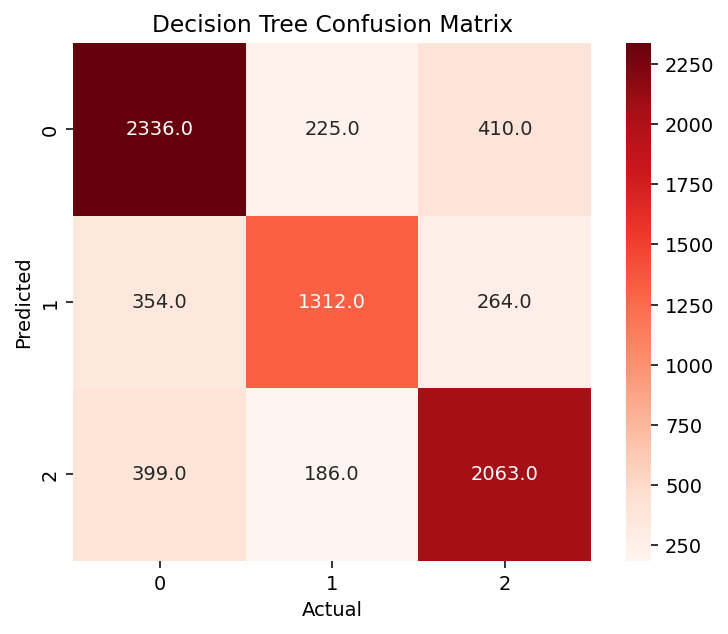

In [22]:
y_pred_dtree = dtree.predict(X_test_tfidf)
cf_tree = confusion_matrix(y_pred_dtree, y_test)
sns.heatmap(cf_tree, cmap="Reds",square=True ,annot=True ,cbar_kws={"orientation":"vertical"}, fmt='.1f')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Decision Tree Confusion Matrix")
plt.savefig('Confusion Matrices/Decision Tree.png')
plt.show()

## KNN

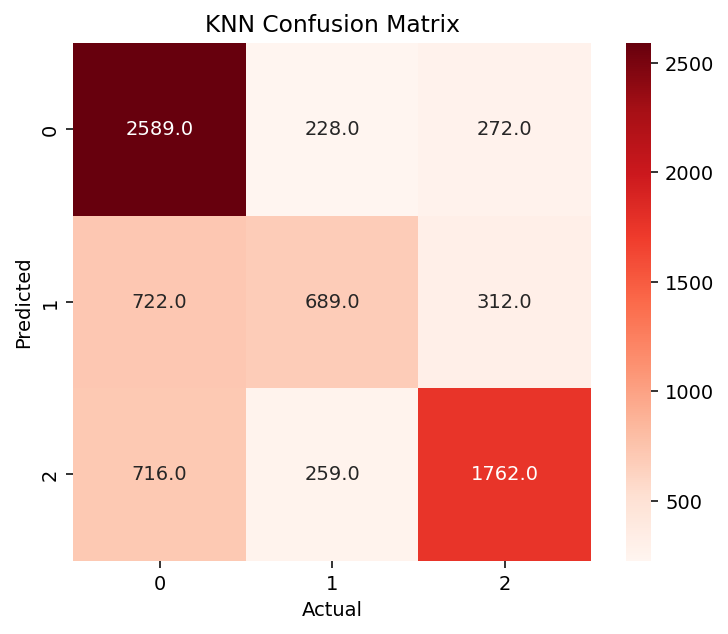

In [27]:
y_pred_knn = knn.predict(X_test_tfidf)
cf_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_knn, cmap="Reds",square=True ,annot=True ,cbar_kws={"orientation":"vertical"}, fmt='.1f')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("KNN Confusion Matrix")
plt.savefig('Confusion Matrices/KNN.png')
plt.show()

## Logistic Regression

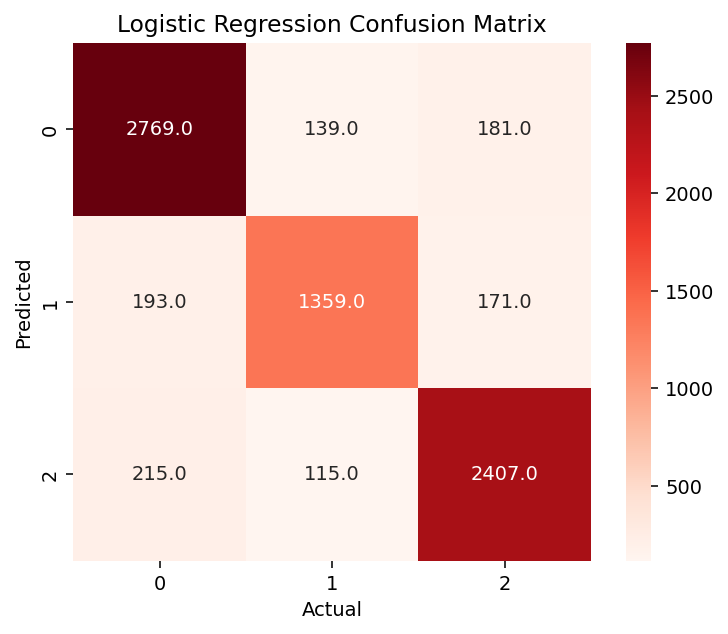

In [26]:
y_pred_lr = lr.predict(X_test_tfidf)
cf_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cf_lr, cmap="Reds",square=True ,annot=True ,cbar_kws={"orientation":"vertical"}, fmt='.1f')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Logistic Regression Confusion Matrix")
plt.savefig('Confusion Matrices/logistic regression.png')
plt.show()

## SVC

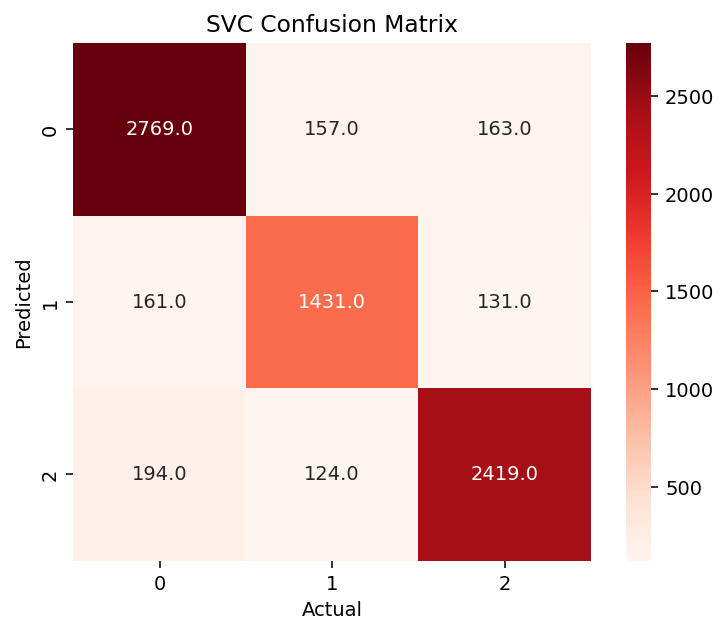

In [25]:
y_pred_svc = svc.predict(X_test_tfidf)
cf_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cf_svc, cmap=sns.color_palette("Reds", as_cmap=True),square=True ,annot=True ,cbar_kws={"orientation":"vertical"}, fmt='.1f')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("SVC Confusion Matrix")
plt.savefig('Confusion Matrices/SVC.png')
plt.show()

## Naive Bayes

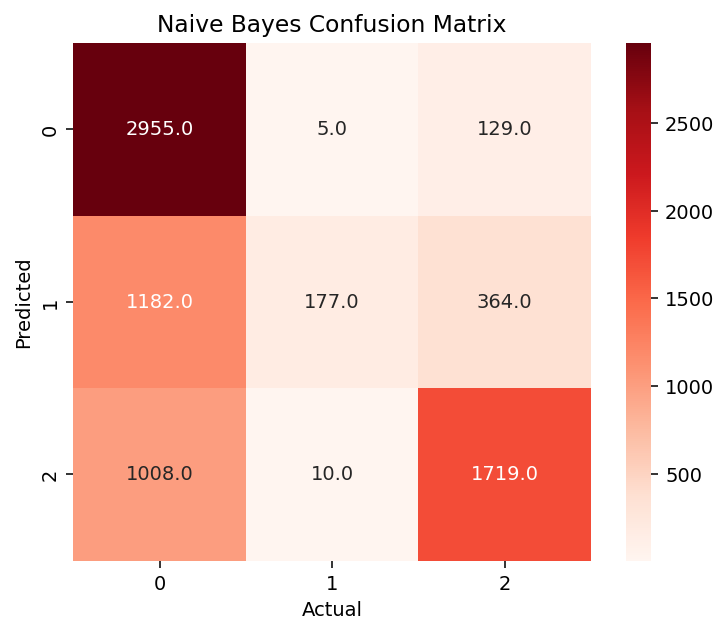

In [34]:
y_pred_nb = nb.predict(X_test_tfidf)
cf_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cf_nb, cmap=sns.color_palette("Reds", as_cmap=True),square=True ,annot=True ,cbar_kws={"orientation":"vertical"}, fmt='.1f')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Naive Bayes Confusion Matrix")
plt.savefig('Confusion Matrices/Naive bayes.png')
plt.show()

## XGBoost

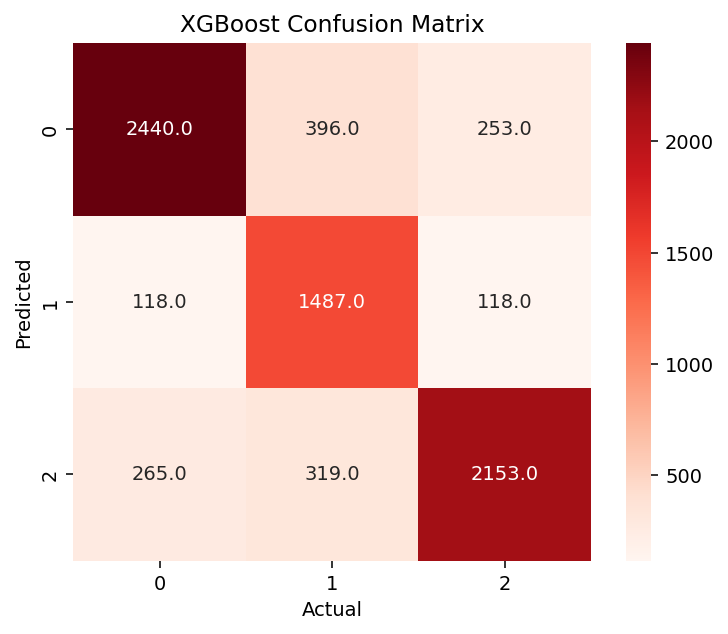

In [33]:
y_pred_xgb = xgb.predict(X_test_tfidf)
cf_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cf_xgb[:-1,1:], cmap=sns.color_palette("Reds", as_cmap=True),square=True ,annot=True ,cbar_kws={"orientation":"vertical"}, fmt='.1f')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("XGBoost Confusion Matrix")
plt.savefig('Confusion Matrices/XGBoost.png')
plt.show()